In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [565]:
# read in data
wage = pd.read_csv('./data/large_train_sample.csv')

In [566]:
#view df
wage.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [567]:
wage.shape

(32561, 14)

## Explore Data

In [568]:
wage.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [569]:
wage['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [570]:
wage[wage['education-num']==9]['education'].value_counts()

 HS-grad    10501
Name: education, dtype: int64

In [571]:
wage['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [572]:
np.sqrt(len(wage))

180.44666802132977

In [573]:
wage['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [574]:
wage['occupation'].sort_values()

12299                    ?
28686                    ?
19255                    ?
8088                     ?
8085                     ?
               ...        
13167     Transport-moving
26247     Transport-moving
26254     Transport-moving
3876      Transport-moving
22429     Transport-moving
Name: occupation, Length: 32561, dtype: object

In [575]:
wage['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [576]:
wage['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [577]:
wage['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [578]:
wage.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


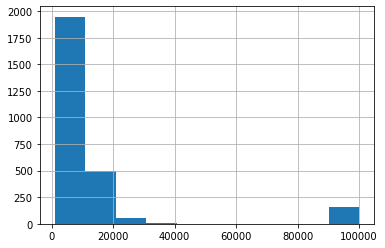

In [579]:
wage[wage['capital-gain'] > 1000]['capital-gain'].hist()

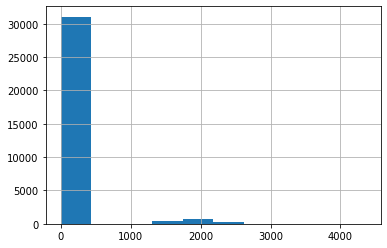

In [580]:
wage['capital-loss'].hist()

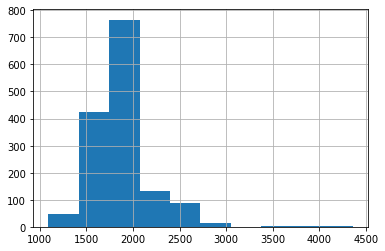

In [581]:
wage[wage['capital-loss'] > 1000]['capital-loss'].hist()

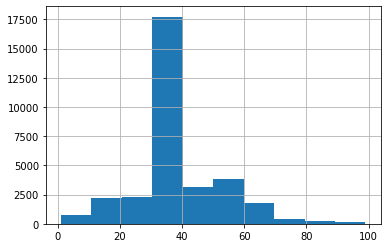

In [582]:
wage['hours-per-week'].hist()

## Clean Data

In [583]:
#remove spaces frm objects
wage = wage.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#### 'Wage' target

In [584]:
#check for spacing
wage['wage'].loc[2]

'<=50K'

In [585]:
#check values
wage['wage'].value_counts()

<=50K    24720
>50K      7841
Name: wage, dtype: int64

In [586]:
#convert values to 0 and 1, target is >50K and will be 1
wage['wage'] = wage['wage'].map({'<=50K' : 0 ,'>50K' :1})

#### 'Workclass'

In [587]:
wage['workclass'].value_counts(normalize=True)

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64

In [588]:
#check format
wage.loc[1]['workclass']

'Self-emp-not-inc'

In [589]:
# remove spaces
wage['workclass'] = wage['workclass'].str.strip()

In [590]:
#check to ensure space was removed
wage.loc[1]['workclass']

'Self-emp-not-inc'

In [591]:
wage[wage['workclass'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,Female,34095,0,32,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Female,0,0,32,United-States,0


In [592]:
#change '?' to 'unknown'
wage['workclass'] = wage['workclass'].replace(to_replace='?', value= 'Unknown')

In [593]:
# check change was applied
wage['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [594]:
# dummify the 'workclass'
wage = pd.get_dummies(wage, columns = ['workclass'] ,drop_first=True)

In [595]:
wage_1.head(2)

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,...,native-country,wage,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,...,United-States,0,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,0,0,0,0,0,0,1,0,0


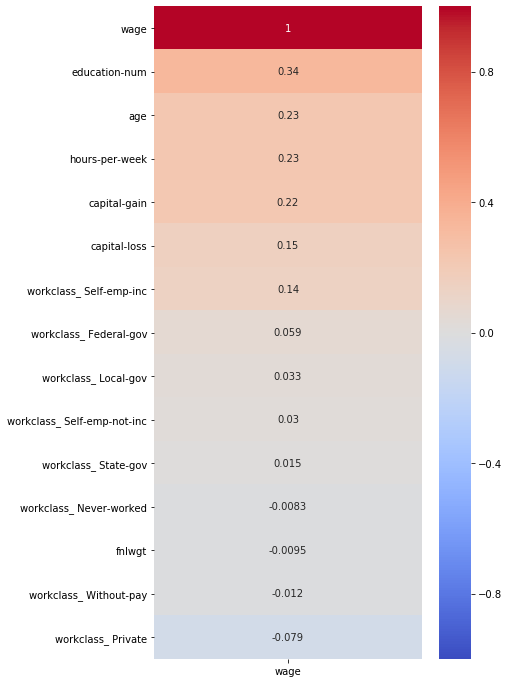

In [596]:
apps_core = wage_1.corr()[['wage']].sort_values(by='wage',ascending=False)
                 
plt.figure(figsize=(6,12))  # 6 by 12 inch to make plot bigger
sns.heatmap(apps_core, vmin=-1,vmax=1,cmap='coolwarm',annot=True)

#### 'education' column

In [597]:
#drop column and instead use 'education-num'
wage.drop(columns = 'education', inplace = True)

In [598]:
# check to ensure change was applied
wage.head(1)

,age,fnlwgt,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay
0,39,77516,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,0,0,0,0,0,0,1,0,0


#### 'marital-status' column

In [599]:
# remove potential spaces
wage['marital-status'] = wage['marital-status'].str.strip()

In [600]:
# dummify the 'marital-status'
wage = pd.get_dummies(wage, columns = ['marital-status'] ,drop_first=True)

In [601]:
# check columns
wage.head(2)

,age,fnlwgt,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,...,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,39,77516,13,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,...,0,1,0,0,0,0,0,1,0,0
1,50,83311,13,Exec-managerial,Husband,Male,0,0,13,United-States,...,1,0,0,0,0,1,0,0,0,0


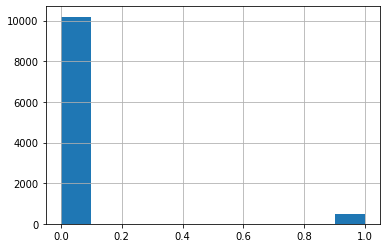

In [602]:
wage[wage['marital-status_Never-married'] == 1]['wage'].hist()

#### 'occupation' column

In [603]:
wage['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [604]:
# remove potential spaces
wage['occupation'] = wage['occupation'].str.strip()

In [605]:
#change '?' to 'unknown'
wage['occupation'] = wage['occupation'].replace(to_replace='?', value= 'Unknown')

In [606]:
# check change was applied
wage['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [607]:
# dummify the 'occupation' column
wage = pd.get_dummies(wage, columns = ['occupation'] ,drop_first=True)

In [608]:
#check columns 
wage.head(2)

,age,fnlwgt,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown
0,39,77516,13,Not-in-family,Male,2174,0,40,United-States,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,Husband,Male,0,0,13,United-States,0,...,0,0,0,0,0,0,0,0,0,0


#### 'Relationship' column


In [609]:
# check values
wage['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [610]:
# remove potential spaces
wage['relationship'] = wage['relationship'].str.strip()

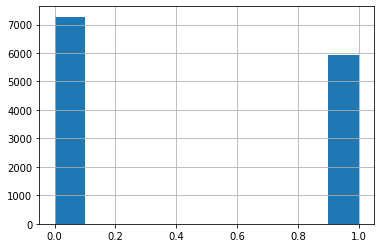

In [611]:
wage[wage['relationship'] == 'Husband']['wage'].hist()
#wage[wage['relationship'] == 'Not-in-family']['wage'].hist()
#wage[wage['relationship'] == 'Own-child']['wage'].hist()
#wage[wage['relationship'] == 'Unmarried']['wage'].hist()
#wage[wage['relationship'] == 'Wife']['wage'].hist()
#wage[wage['relationship'] == 'Other-relative']['wage'].hist()



In [612]:
#skip as a feature for now, may comeback

#### 'sex' column

In [613]:
# remove potential spaces
wage['sex'] = wage['sex'].str.strip()

In [614]:
#check values
wage['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [615]:
#change Male and Female to 0 and 1
wage['sex'] = wage['sex'].map({'Male': 0, 'Female': 1})

In [616]:
#check change was applied
wage['sex'].value_counts()

0    21790
1    10771
Name: sex, dtype: int64

#### 'native-country' column

In [617]:
wage['native-country'].loc[0]

'United-States'

In [618]:
# change any value that is not 'United-States' to 0, and 'United-States' to 1
wage['native-country'] = wage['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

In [619]:
wage['native-country'].value_counts()

1    29170
0     3391
Name: native-country, dtype: int64

#### 'capital-gain' column

In [620]:
# change values to high = 2, low = 1, none = 0
def covert_capital_gain(x):   
    if(x ==0) :
        return 0
    elif(x <=30000):
        return 1
    else:
        return 2
wage['capital-gain'] = wage['capital-gain'].map(covert_capital_gain)

In [621]:
# check to ensure change was made
wage['capital-gain'].value_counts()

0    29849
1     2546
2      166
Name: capital-gain, dtype: int64

#### 'capital loss' column

In [622]:
# change values to high = 2, low = 1, none = 0
def convert_capital_loss(x):
    if(x ==0) :
        return 0
    elif(x <=3000):
        return 1
    else:
        return 2
wage['capital-loss'] = wage['capital-loss'].map(convert_capital_loss)

In [623]:
#check to ensure change was made
wage['capital-loss'].value_counts()

0    31042
1     1508
2       11
Name: capital-loss, dtype: int64

In [626]:
wage.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
sex,32561.0,0.330795,0.470506,0.0,0.0,0.0,1.0,1.0
capital-gain,32561.0,0.088388,0.301288,0.0,0.0,0.0,0.0,2.0
capital-loss,32561.0,0.046989,0.213208,0.0,0.0,0.0,0.0,2.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
native-country,32561.0,0.895857,0.305451,0.0,1.0,1.0,1.0,1.0
wage,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0
workclass_Local-gov,32561.0,0.064279,0.245254,0.0,0.0,0.0,0.0,1.0


In [627]:
#export clean data
wage.to_csv('./data/train_clean.csv',index=)